# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [12]:
# Import the titanic dataset here
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [13]:
# See the Classes we have of passengers (1st, 2nd, 3rd)
df_titanic['class'].unique()

# Filter to keep only passengers (classes 1:3)
df_titanic = df_titanic[df_titanic['class'].isin(['1st','2nd','3rd'])] 

#Crosstab
pd.crosstab(df_titanic['class'], df_titanic['embarked'])

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?

**(S given 3rd class) - 69.67%**
* What proportion of Southampton passengers were in 3rd class?

**(3rd class given S) - 54.0481%**

In [14]:
# Conditional of Class Given Embarked
cond_dist_class_given_embarked = pd.crosstab(df_titanic['class'], df_titanic['embarked'], normalize='columns')
cond_dist_class_given_embarked

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [15]:
# Conditional of Embarked Given Class
cond_dist_embarked_given_class = pd.crosstab(df_titanic['class'], df_titanic['embarked'], normalize='index')
cond_dist_embarked_given_class

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

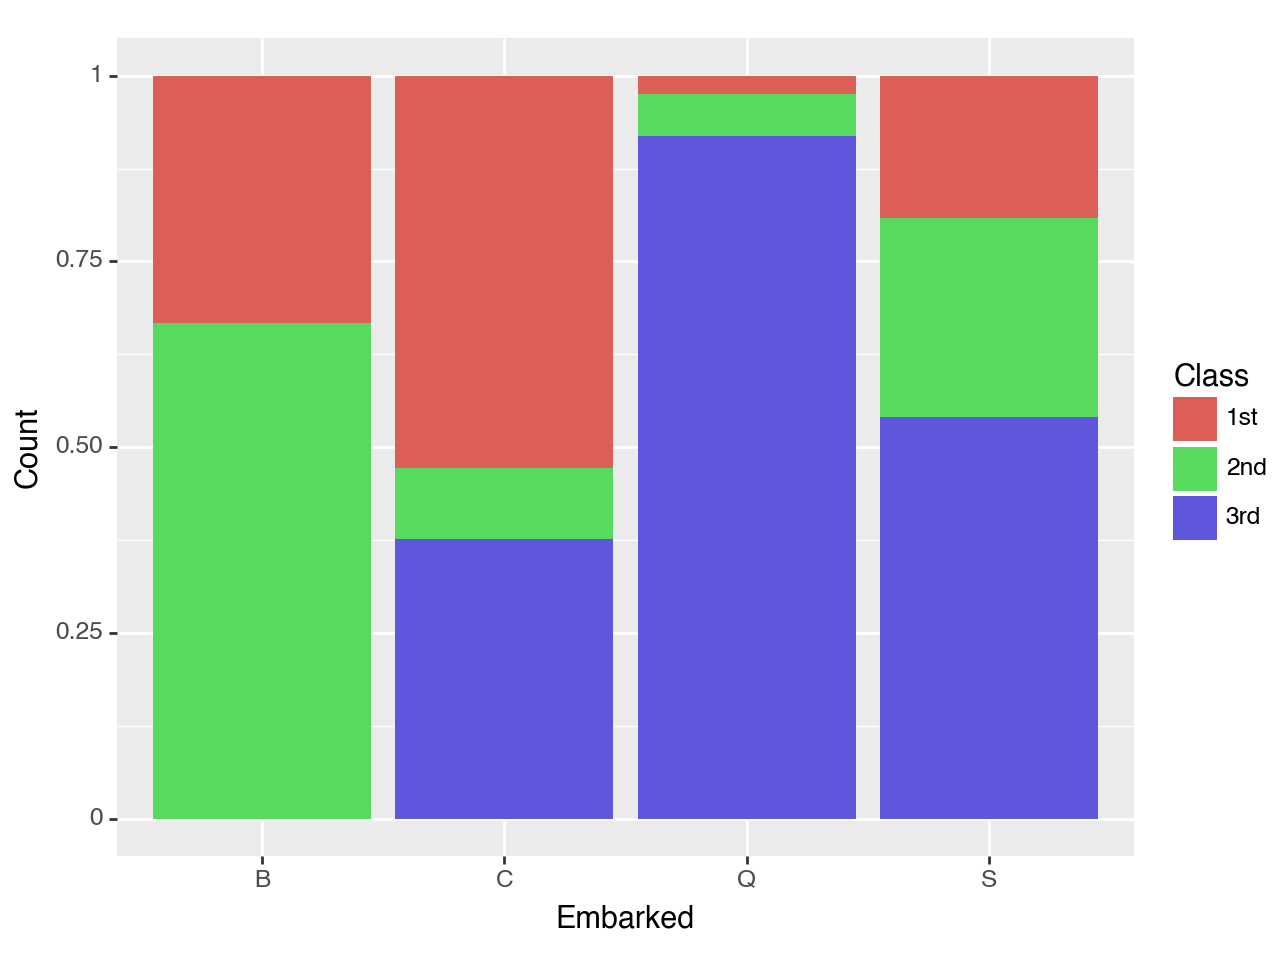

<Figure Size: (640 x 480)>

In [16]:
# Code here
from plotnine import *

(ggplot(df_titanic, aes(x = "embarked",fill = "class"))
        + labs(x = "Embarked", y = "Count", fill = "Class")
        + geom_bar(position = "fill")
)

**This visualization provides a clear picture of each class distribution based on the 4 places where the Titanic embarked from.  It not only took more code to use crosstab to find the conditional frequencies, but also with the summary tables, the information can be difficult to visualize and make insights on.  With a graph of embarked places on the X, split up by the 3 classes, it is easy for one to see insights. For example, those embarking from Q had around 90% of 3rd class passengers, while B had no 3rd class riders, instead having a third of 1st class and the remaining 2nd class passengers. Embarking from S can be seen to have the most equally distributed classes as well.**